# Data

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
data = pd.read_csv("Data/heart_disease_uci.csv")
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Potential problems to explore
#### 1. Does age or gender affect the likelihood of heart disease?

#### 2. Which risk factors are most common in patients with heart disease?

#### 3. What are some of the metric patterns that raise the likelihood of heart disease in patients ?

#### 4. Do men and women with heart disease tend to experience different types of chest pain?

# David Arzumanyan

In [79]:
data.shape

(920, 16)

In [80]:
data = data.rename(columns={"trestbps": "Resting_Blood_Pressure", "fbs": "Fasting_Blood_Sugar_High", "thalch": "Max_Heart_Rate_Achieved",
                            "exang" : "Exercise_Induced_Angina", "oldpeak" : "ST_Depression_Exercise", "ca" : "Major_Vessels", "thal" : "Thalassemia_Type"})

In [81]:
data.head()

,id,age,sex,dataset,cp,Resting_Blood_Pressure,chol,Fasting_Blood_Sugar_High,restecg,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression_Exercise,slope,Major_Vessels,Thalassemia_Type,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [82]:
data.isnull().sum()

id                            0
age                           0
sex                           0
dataset                       0
cp                            0
Resting_Blood_Pressure       59
chol                         30
Fasting_Blood_Sugar_High     90
restecg                       2
Max_Heart_Rate_Achieved      55
Exercise_Induced_Angina      55
ST_Depression_Exercise       62
slope                       309
Major_Vessels               611
Thalassemia_Type            486
num                           0
dtype: int64

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   sex                       920 non-null    object 
 3   dataset                   920 non-null    object 
 4   cp                        920 non-null    object 
 5   Resting_Blood_Pressure    861 non-null    float64
 6   chol                      890 non-null    float64
 7   Fasting_Blood_Sugar_High  830 non-null    object 
 8   restecg                   918 non-null    object 
 9   Max_Heart_Rate_Achieved   865 non-null    float64
 10  Exercise_Induced_Angina   865 non-null    object 
 11  ST_Depression_Exercise    858 non-null    float64
 12  slope                     611 non-null    object 
 13  Major_Vessels             309 non-null    float64
 14  Thalassemi

In [84]:
# Checking for duplicated rows
np.sum(data.duplicated())

np.int64(0)

In [85]:
# Checking inconsistent or invalid Entries
print(pd.unique(data["sex"].values))
print(pd.unique(data["dataset"].values))
print(pd.unique(data["cp"].values))
print(pd.unique(data["restecg"].values))
print(pd.unique(data["Exercise_Induced_Angina"].values))
print(pd.unique(data["ST_Depression_Exercise"].values))
print(pd.unique(data["slope"].values))
print(pd.unique(data["Major_Vessels"].values))
print(pd.unique(data["Thalassemia_Type"].values))
print(pd.unique(data["num"].values))

['Male' 'Female']
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
['lv hypertrophy' 'normal' 'st-t abnormality' nan]
[False True nan]
[ 2.3  1.5  2.6  3.5  1.4  0.8  3.6  0.6  3.1  0.4  1.3  0.   0.5  1.6
  1.   1.2  0.2  1.8  3.2  2.4  2.   2.5  2.2  2.8  3.   3.4  6.2  4.
  5.6  2.9  0.1  2.1  1.9  4.2  0.9  1.1  3.8  0.7  0.3  4.4  5.   nan
 -1.1 -1.5 -0.1 -2.6 -0.7 -2.  -1.   1.7 -0.8 -0.5 -0.9  3.7]
['downsloping' 'flat' 'upsloping' nan]
[ 0.  3.  2.  1. nan]
['fixed defect' 'normal' 'reversable defect' nan]
[0 2 1 3 4]


In [86]:
print(np.sum(data["restecg"].isna()))
data = data.dropna(subset=["restecg"])

2


In [87]:
print(np.sum(data["Exercise_Induced_Angina"].isna()))
data = data.dropna(subset="Exercise_Induced_Angina")

55


In [88]:
# There are some ST_Depression_Exercise values that are negative and unusal
# Since it's just 12 of them we will remove them
np.sum(data["ST_Depression_Exercise"] < 0)
data = data.drop(data[data["ST_Depression_Exercise"] < 0].index) 

In [89]:
# Fixing null "Slope" values

# Healty heart during exercies
print(np.sum(data[(data["Max_Heart_Rate_Achieved"] > 125) & (data["Exercise_Induced_Angina"] == False) & (data["ST_Depression_Exercise"] == 0.0)]["slope"].isna()))

# Medium ischemia
print(np.sum(data[((data["Max_Heart_Rate_Achieved"] > 115) & (data["Max_Heart_Rate_Achieved"] <= 125)) & 
     ((data["ST_Depression_Exercise"] > 1) & 
      (data["ST_Depression_Exercise"] <= 3.5))]["slope"].isna()))

# Significant ischemia
print(np.sum(data[(data["Max_Heart_Rate_Achieved"] < 120) & (data["Exercise_Induced_Angina"] == True) & (data["ST_Depression_Exercise"] > 3.5)]["slope"].isna()))

155
2
0


In [90]:
# Healthy heart slope
data.loc[(data["Max_Heart_Rate_Achieved"] > 125) & 
         (data["Exercise_Induced_Angina"] == False) & 
         (data["ST_Depression_Exercise"] == 0.0) & 
         (data["slope"].isna()), 
         "slope"] = "upsloping"

# Medium ischemia slope
data.loc[(data["Max_Heart_Rate_Achieved"] > 115) & 
         (data["Max_Heart_Rate_Achieved"] <= 125) & 
         (data["ST_Depression_Exercise"] > 1) & 
         (data["ST_Depression_Exercise"] <= 3.5) &
         (data["slope"].isna()),
         "slope"] = "flat"

# Significant ischemia slope
data.loc[(data["Max_Heart_Rate_Achieved"] < 120) & 
         (data["Exercise_Induced_Angina"] == True) & 
         (data["ST_Depression_Exercise"] > 3.5) &
         (data["slope"].isna()),
         "slope"] = "downsloping"

In [91]:
# Dropping the remaining null slope values
np.sum(data["slope"].isna())
data = data.dropna(subset=["slope"])

In [92]:
# Filling missing "Major_Vessels" (major vessels observed) values with -1 as a placeholder
# that a data is missing
data["Major_Vesselsa"] = data["Major_Vessels"].fillna(-1)

In [93]:
# "Thalassemia_Type" thallium stress test column
data["Thalassemia_Type"] = data["Thalassemia_Type"].fillna("unknown")

In [94]:
# "Fasting_Blood_Sugar_High" 
'''A fasting blood sugar over 120 mg/dL suggests hyperglycemia, which may indicate Diabetes mellitus, or
Impaired glucose tolerance (pre-diabetes). We will leave null values to indicate not performed tests''' 

'A fasting blood sugar over 120 mg/dL suggests hyperglycemia, which may indicate Diabetes mellitus, or\nImpaired glucose tolerance (pre-diabetes). We will leave null values to indicate not performed tests'

| Cholesterol level (mg/dL) | Classification  | Meaning                       |
| ------------------------- | --------------- | ----------------------------- |
| `< 200`                   | Desirable       | Normal range                  |
| `200–239`                 | Borderline high | Elevated risk                 |
| `≥ 240`                   | High            | Risk factor for heart disease |


In [95]:
# "chol" - filling with -1 to indicate missing values
data["chol"] = data["chol"].fillna(-1)

In [96]:
# Filling Resting_Blood_Pressure with "unkown"
data["Resting_Blood_Pressure"] = data["Resting_Blood_Pressure"].fillna("unkown")

In [97]:
# Intentionally left the "fbs" nan values to flag those values as missing
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 915
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        754 non-null    int64  
 1   age                       754 non-null    int64  
 2   sex                       754 non-null    object 
 3   dataset                   754 non-null    object 
 4   cp                        754 non-null    object 
 5   Resting_Blood_Pressure    754 non-null    object 
 6   chol                      754 non-null    float64
 7   Fasting_Blood_Sugar_High  688 non-null    object 
 8   restecg                   754 non-null    object 
 9   Max_Heart_Rate_Achieved   754 non-null    float64
 10  Exercise_Induced_Angina   754 non-null    object 
 11  ST_Depression_Exercise    754 non-null    float64
 12  slope                     754 non-null    object 
 13  Major_Vessels             307 non-null    float64
 14  Thalassemia_Typ

#### 1. Does age or gender affect the likelihood of heart disease?

In [98]:
# Adding a new column of patients having a heart disease
data["has_disease"] = (data["num"] > 0).astype(int)
data["has_disease"]

0      0
1      1
2      1
3      0
4      0
      ..
910    0
911    1
912    1
914    1
915    1
Name: has_disease, Length: 754, dtype: int64

In [99]:
data["has_disease"].value_counts(normalize=True)

has_disease
1    0.545093
0    0.454907
Name: proportion, dtype: float64

In [100]:
sns.histplot(x='age', hue='has_disease', data=data, multiple='stack')
plt.title("Age distribution by Heart Disease")

Text(0.5, 1.0, 'Age distribution by Heart Disease')

In [101]:
# Male/Female Heart Disease presence count
sns.countplot(x="sex", hue="has_disease", data=data)
plt.title("Male/Female Heart Disease count")

Text(0.5, 1.0, 'Male/Female Heart Disease count')

In [102]:
# Male/Female Heart Disease presence ratio
sns.barplot(x="sex", y="has_disease", data=data, estimator=np.mean)
plt.title("Male/Female Heart Disease ratio")

Text(0.5, 1.0, 'Male/Female Heart Disease ratio')

In [103]:
# Severity of heart disease based on gender
has_disease = data[data["num"] > 0]
plt.ylabel("Severity of disease")
sns.boxplot(x="sex", y="num", data=has_disease)

<Axes: title={'center': 'Male/Female Heart Disease ratio'}, xlabel='age', ylabel='Severity of disease'>

In [104]:
# Heart disease presence and severity based on age and gender
plt.figure(figsize=(9,5))
plt.xlabel("Severity of disease")
sns.boxplot(x="num", y="age", data=data, hue="sex")

<Axes: xlabel='Severity of disease', ylabel='age'>

In [105]:
plt.figure(figsize=(9,5))
plt.xlabel("Severity of disease")
sns.lineplot(x="num", y="age", data=data, hue="sex")

<Axes: xlabel='Severity of disease', ylabel='age'>

#### Do men and women with heart disease tend to experience different types of chest pain?

| Value | Name                 | Meaning                                                                                                                                                | Typical Risk of Heart Disease                             |
| ----- | -------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------- |
| **1** | **Typical Angina**   | Classic chest pain caused by reduced blood flow to the heart (ischemia). Usually occurs with exertion or stress and relieved by rest or nitroglycerin. | **High**                                                  |
| **2** | **Atypical Angina**  | Chest discomfort that shares some features with angina but not all — may occur at rest or vary in character.                                           | **Moderate**                                              |
| **3** | **Non-anginal Pain** | Chest pain *not* related to heart muscle oxygen deprivation (e.g., due to anxiety, indigestion, or musculoskeletal causes).                            | **Low**                                                   |
| **4** | **Asymptomatic**     | No chest pain at all, but patient shows other signs of heart disease (like abnormal ECG or stress test results).                                       | **Often High** — especially in older or diabetic patients |


In [106]:
# Chest pain types of genders
sns.countplot(x="sex", hue="cp", data=has_disease)

<Axes: xlabel='Severity of disease', ylabel='age'>

In [107]:
# Chest pain types of genders
plt.figure(figsize=(9,5))
sns.boxplot(x="cp", y="age", hue="sex", data=has_disease)

<Axes: xlabel='cp', ylabel='age'>

In [108]:
# Crosstab for heatmap
cp_gender = pd.crosstab(has_disease["cp"], has_disease["sex"])
cp_gender

sex,Female,Male
cp,,
asymptomatic,37,288
atypical angina,4,17
non-anginal,5,44
typical angina,1,15


In [109]:
# Heatmap of chest pain types by gender
plt.figure(figsize=(8,5))
sns.heatmap(cp_gender, annot=True, fmt="d", cmap="coolwarm")
plt.title("Chest pain types by gender (Patients with Heart Disease)")
plt.xlabel("Gender")
plt.ylabel("Chest Pain Type")

Text(70.72222222222221, 0.5, 'Chest Pain Type')

# Daniel Tapia

# Raghav Vaid

In [110]:
data.describe()

,id,age,chol,Max_Heart_Rate_Achieved,ST_Depression_Exercise,Major_Vessels,num,Major_Vesselsa,has_disease
count,754.000000,754.000000,754.000000,754.000000,754.000000,307.000000,754.000000,754.000000,754.000000
mean,409.285146,52.958886,200.083554,140.946950,0.995623,0.674267,0.984085,-0.318302,0.545093
std,254.615591,9.488913,112.396624,24.727355,1.085542,0.934849,1.147669,1.016208,0.498293
min,1.000000,28.000000,-1.000000,60.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,189.250000,46.000000,175.000000,124.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,388.000000,54.000000,225.000000,142.000000,0.850000,0.000000,1.000000,-1.000000,1.000000
75%,623.500000,60.000000,269.000000,160.000000,1.700000,1.000000,2.000000,0.000000,1.000000
max,916.000000,77.000000,603.000000,202.000000,6.200000,3.000000,4.000000,3.000000,1.000000


In [111]:
# has_disease = data[data["has_disease"] == 1]
no_disease = data[data["has_disease"] == 0]

numeric_cols = data.select_dtypes(include=["number"]).columns

comparison = pd.DataFrame({
    "With disease": has_disease[numeric_cols].mean(),
    "Without disease": no_disease[numeric_cols].mean()
})

comparison

'''
id: a unique identifier for each patient/record

age: age of patient (years)

Resting_Blood_Pressure: resting blood pressure (in mm Hg) measured
when the patient is at rest

chol: serum cholesterol (in mg/dL)

Max_Heart_Rate_Achieved: max heart rate achieved during exercise

ST_Depression_Exercise: how much the ST segment goes down during exercise 
compared to rest (ST segment is the flat part)

Major_Vessels: number of major vessels (0-3) colored by flouroscopy
''' 

'\nid: a unique identifier for each patient/record\n\nage: age of patient (years)\n\nResting_Blood_Pressure: resting blood pressure (in mm Hg) measured\nwhen the patient is at rest\n\nchol: serum cholesterol (in mg/dL)\n\nMax_Heart_Rate_Achieved: max heart rate achieved during exercise\n\nST_Depression_Exercise: how much the ST segment goes down during exercise \ncompared to rest (ST segment is the flat part)\n\nMajor_Vessels: number of major vessels (0-3) colored by flouroscopy\n'

In [112]:
data.head()

,id,age,sex,dataset,cp,Resting_Blood_Pressure,chol,Fasting_Blood_Sugar_High,restecg,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,ST_Depression_Exercise,slope,Major_Vessels,Thalassemia_Type,num,Major_Vesselsa,has_disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0.0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,3.0,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,2.0,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0.0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0.0,0


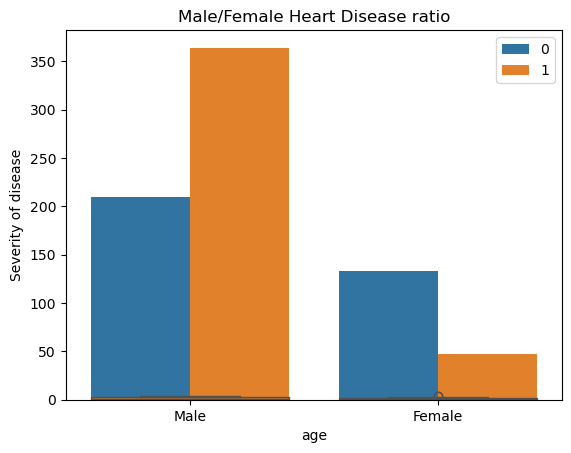

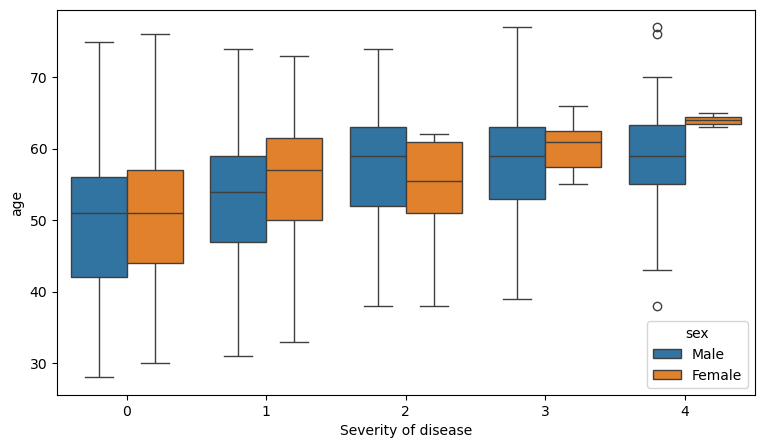

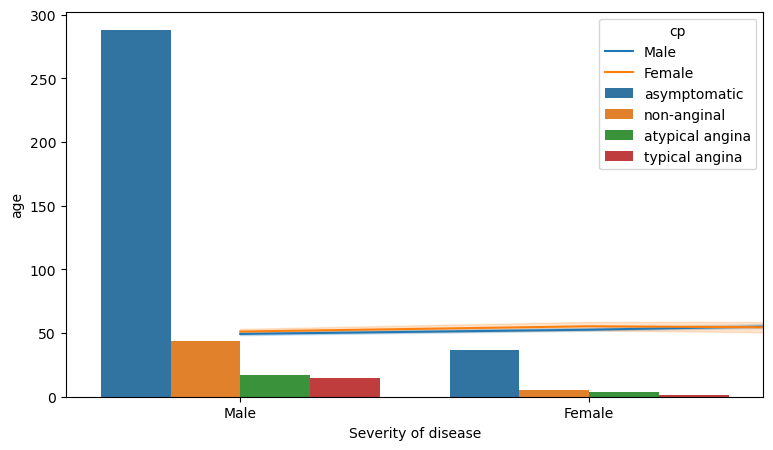

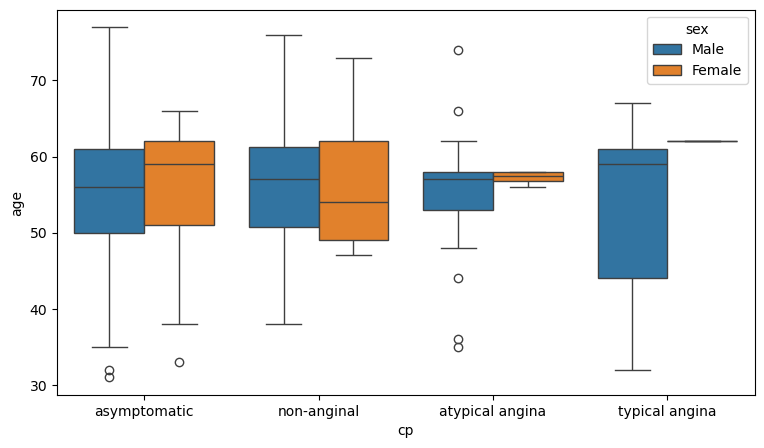

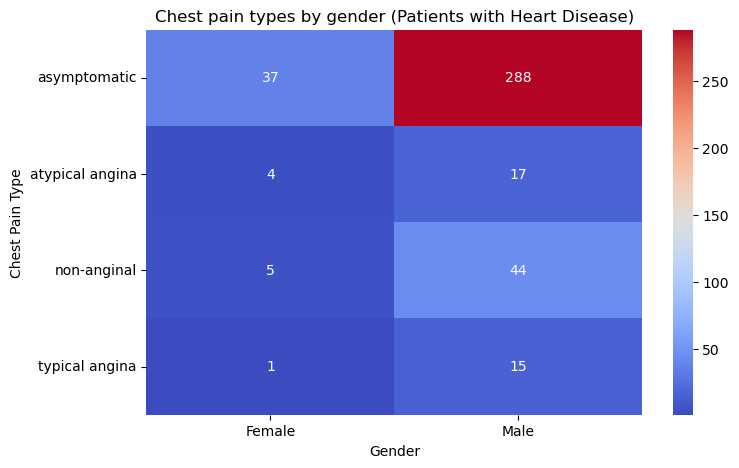

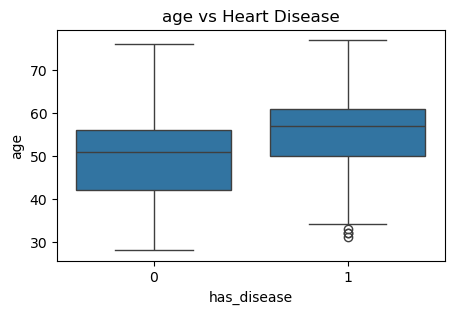

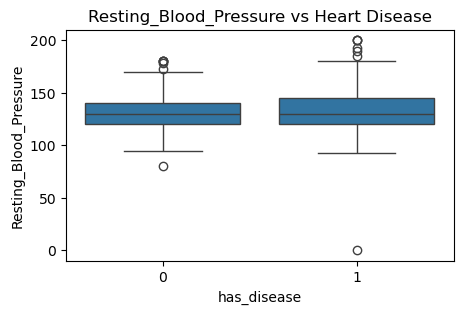

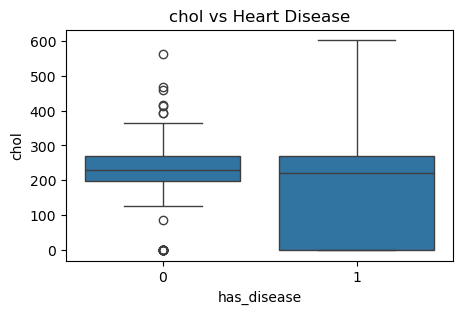

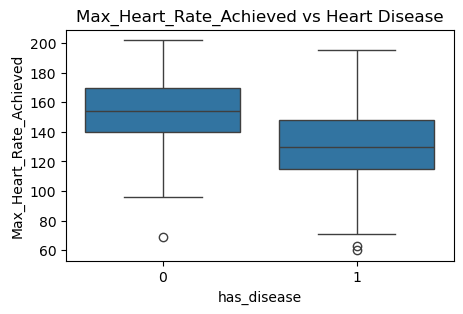

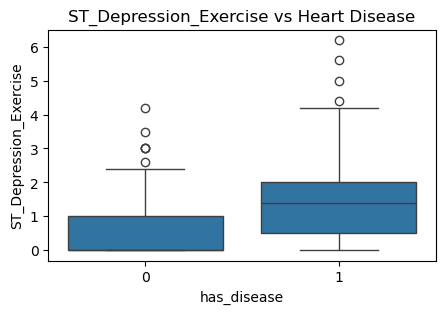

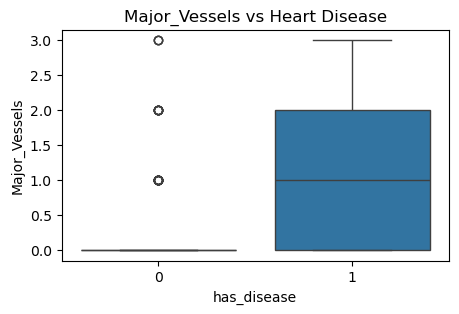

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# data = data.rename(columns={"trestbps": "Resting_Blood_Pressure", "fbs": "Fasting_Blood_Sugar_High", "thalch": "Max_Heart_Rate_Achieved",
#                             "exang" : "Exercise_Induced_Angina", "oldpeak" : "ST_Depression_Exercise", "ca" : "Major_Vessels", "thal" : "Thalassemia_Type"})

features = ["age", "Resting_Blood_Pressure", "chol", "Max_Heart_Rate_Achieved", "ST_Depression_Exercise", "Major_Vessels"]

# needed to add this line below because seaborn thinks one of the column is text instead of numeric
data["Resting_Blood_Pressure"] = pd.to_numeric(data["Resting_Blood_Pressure"], errors="coerce")

# makes boxblots for each feature for people with and without heart disease
for col in features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x="has_disease", y=col, data= data)
    plt.title(f"{col} vs Heart Disease")
    plt.show()

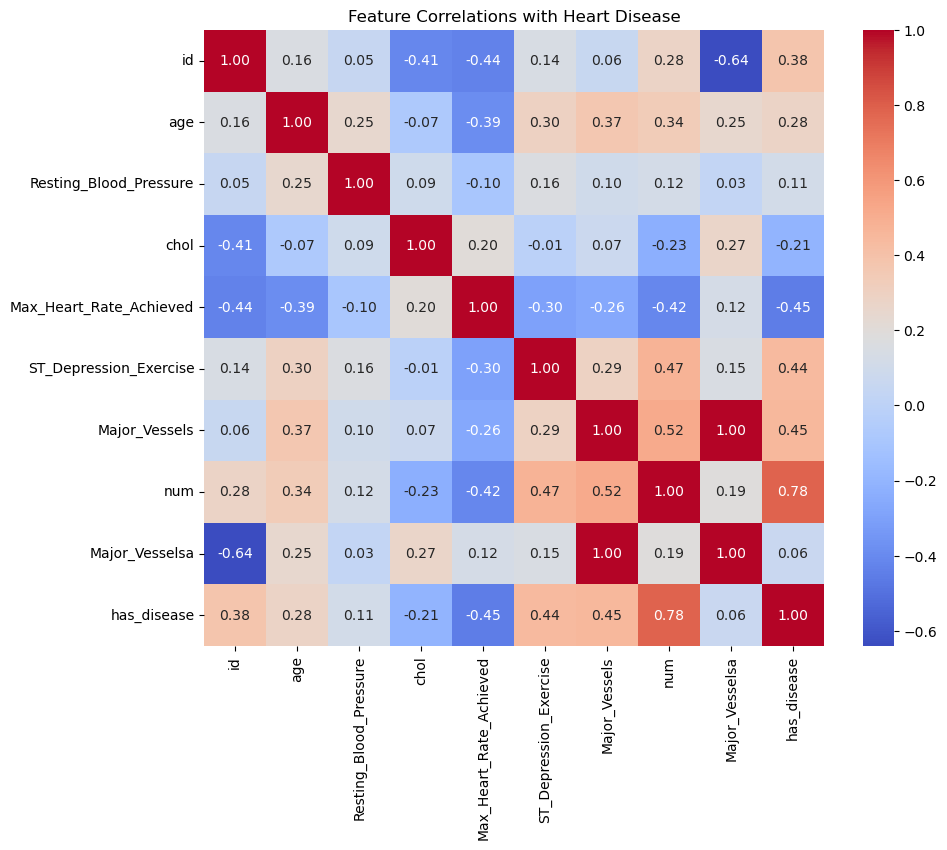

In [114]:
numeric_data = data.select_dtypes(include= ["int64", "float64"])
# print(numeric_data.columns)

plt.figure(figsize= (10,8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlations with Heart Disease")
plt.show()

# Conclusion

Based on the data analysis and heatmap correlations, the key factors that increase the likelihood of heart disease are:

- Higher oldpeak (greater ST depression)
- Lower thalch (lower max heart rate)
- Slightly older age

Other factors like cholesterol and resting blood pressure show weak or inconsistent relationships. This aligns with known medical trends, where exercise-induced stress test results are strong indicators of cardiovascular risk.